In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
act = pd.read_csv('OTg6QzA_activities.csv')
act.shape

(66281, 4)

In [28]:
# 직전 데이터를 추가
act['p_timestamp'] = act['timestamp'].shift(1)
act['p_X'] = act['X'].shift(1)
act['p_Y'] = act['Y'].shift(1)
act['p_Z'] = act['Z'].shift(1)
act.head()

,timestamp,X,Y,Z,p_timestamp,p_X,p_Y,p_Z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [29]:
# NaN 값 빼기
dropna_act = act.dropna()
dropna_act.head()

,timestamp,X,Y,Z,p_timestamp,p_X,p_Y,p_Z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [30]:
# 두 점 사이의 거리 구하기
def calc_dist(df):
    X_d = df['X'] - df['p_X'] 
    Y_d =  df['Y'] - df['p_Y']
    Z_d = df['Z'] - df['p_Z']
    distance = np.sqrt((X_d ** 2) + (Y_d ** 2) + (Z_d ** 2))

    return distance

# 시간차 구하기
def calc_timediff(df):
    t1 = datetime.strptime(df['timestamp'], '%Y-%m-%d %H:%M:%S.%f')
    t2 = datetime.strptime(df['p_timestamp'], '%Y-%m-%d %H:%M:%S.%f')

    return (t1-t2).total_seconds()

dropna_act.loc[:, 'dist'] = dropna_act.loc[:, ['X', 'p_X', 'Y', 'p_Y', 'Z', 'p_Z']].apply(calc_dist, axis=1)

dropna_act['d_time'] = dropna_act.loc[:, ['timestamp', 'p_timestamp']].apply(calc_timediff, axis=1)

dropna_act

C:\Users\302-09\AppData\Local\Temp\ipykernel_15084\1778224629.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_act.loc[:, 'dist'] = dropna_act.loc[:, ['X', 'p_X', 'Y', 'p_Y', 'Z', 'p_Z']].apply(calc_dist, axis=1)
C:\Users\302-09\AppData\Local\Temp\ipykernel_15084\1778224629.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_act['d_time'] = dropna_act.loc[:, ['timestamp', 'p_timestamp']].apply(calc_timediff, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_X,p_Y,p_Z,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901
...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043


In [31]:
# 거리/시간을 이용해서 속도 구하기
def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        return 0
    
dropna_act['activity'] = dropna_act.loc[:, ['dist', 'd_time']].apply(calc_act, axis=1)
dropna_act

C:\Users\302-09\AppData\Local\Temp\ipykernel_15084\2535195766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_act['activity'] = dropna_act.loc[:, ['dist', 'd_time']].apply(calc_act, axis=1)


,timestamp,X,Y,Z,p_timestamp,p_X,p_Y,p_Z,dist,d_time,activity
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,12.649111,12.901,0.980475
...,...,...,...,...,...,...,...,...,...,...,...
66276,2022-01-31 23:28:00.481,-91,143,136,2022-01-31 23:27:55.381,-92.0,127.0,138.0,16.155494,5.100,3.167744
66277,2022-01-31 23:28:41.683,-89,145,138,2022-01-31 23:28:00.481,-91.0,143.0,136.0,3.464102,41.202,0.084076
66278,2022-01-31 23:28:49.383,-93,138,137,2022-01-31 23:28:41.683,-89.0,145.0,138.0,8.124038,7.700,1.055070
66279,2022-01-31 23:32:36.426,-93,131,137,2022-01-31 23:28:49.383,-93.0,138.0,137.0,7.000000,227.043,0.030831


<Axes: title={'center': 'calculation'}, xlabel='time series', ylabel='activity [cm/sec]'>

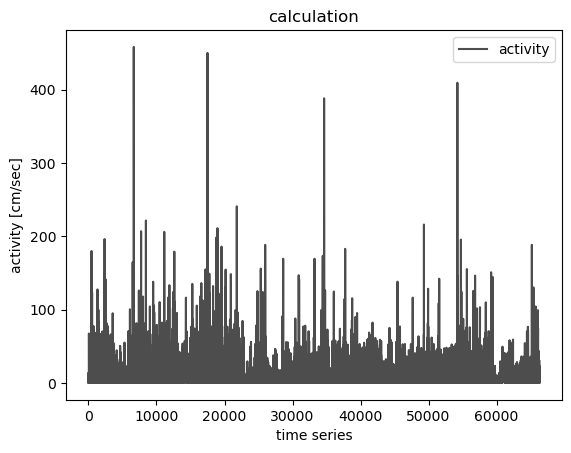

In [32]:
# 속도에 대한 그래프 그리기
dropna_act.plot(y='activity', color='0.3', title='calculation', xlabel='time series', ylabel='activity [cm/sec]')

In [33]:
# 10분 단위로 그룹화하기 
# 문자열 상태에서는 날짜 연산이 불가능하기 때문에 타입 변환
dropna_act2 = dropna_act.copy()

dropna_act2 = dropna_act2[['timestamp', 'activity']]

dropna_act2['timestamp'] = dropna_act2['timestamp'].astype('datetime64[ns]')

dropna_act2 = dropna_act2.set_index('timestamp')

dropna_act2.dtypes

dropna_act2

,activity
timestamp,
2022-01-01 00:01:42.961,4.251486
2022-01-01 00:01:45.562,4.953517
2022-01-01 00:01:48.163,9.146772
2022-01-01 00:02:08.864,1.134954
2022-01-01 00:02:21.765,0.980475
...,...
2022-01-31 23:28:00.481,3.167744
2022-01-31 23:28:41.683,0.084076
2022-01-31 23:28:49.383,1.055070


<Axes: title={'center': 'calculation'}, xlabel='time series', ylabel='activity [cm/sec]'>

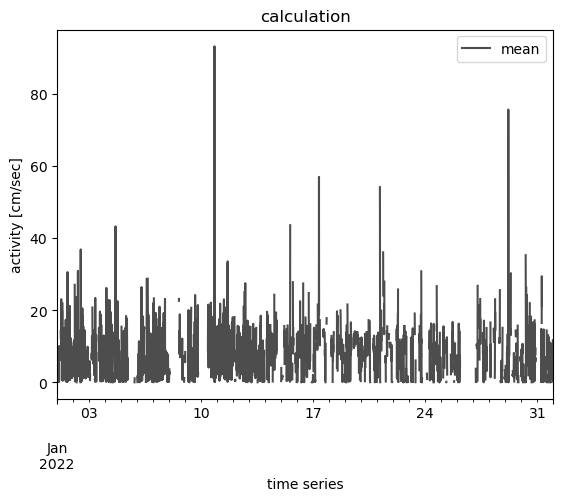

In [34]:
# 10분 단위로 그룹화 후 그래프 그리기
tenmin = dropna_act2.resample('10min')

result = tenmin['activity'].agg(['mean', 'min', 'max'])

result

result.plot(y='mean', color='0.3', title='calculation', xlabel='time series', ylabel='activity [cm/sec]')

C:\Users\302-09\AppData\Local\Temp\ipykernel_15084\2428302877.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  oneH = dropna_act2.resample('1H')


0.0010429491293542225

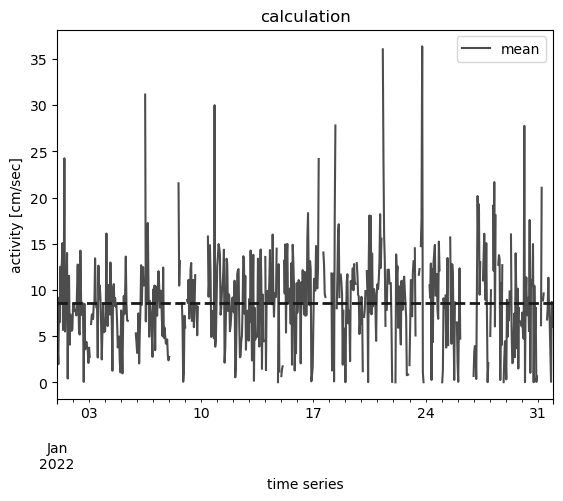

In [35]:
# 1시간 단위로 그룹화 후 그래프 그리기
oneH = dropna_act2.resample('1H')

result = oneH['activity'].agg(['mean', 'min', 'max'])

result.plot(y='mean', color='0.3', title='calculation', xlabel='time series', ylabel='activity [cm/sec]')
# 평균 경계선 
plt.hlines(result['mean'].mean(),  min(result.index), max(result.index),  color='0.1', linestyle='--', linewidth=2)
result['mean'].max()
result['mean'].min()
#result

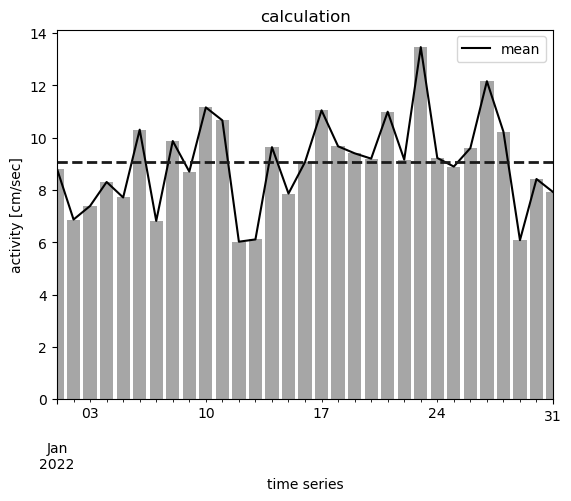

In [52]:
# 1일 단위로 그룹화 
oneD = dropna_act2.resample('D')

result = oneD['activity'].agg(['mean', 'min', 'max'])

result.plot(y='mean', color='k', title='calculation', xlabel='time series', ylabel='activity [cm/sec]')
plt.bar(result.index, result['mean'], color='gray', alpha=0.7)


# 평균 경계선 
plt.hlines(result['mean'].mean(),  min(result.index), max(result.index),  color='0.1', linestyle='--', linewidth=2)
#result